## Preprocessing 

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# cd drive/MyDrive/NLP_Project

In [1]:
# !pip install pandas matplotlib tqdm seaborn sklearn numpy graphviz
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('always') 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pickle as pk

In [2]:
trainData = np.load('../../../dataFinal/npy_files/noWE_t2_train.npy')
trainLabels = open('../../../dataFinal/finalTrainLabels.labels', 'r').readlines()
testData = np.load('../../../dataFinal/npy_files/noWE_t2_test.npy')
testLabels = open('../../../dataFinal/finalTestLabels.labels', 'r').readlines()
validationData = np.load('../../../dataFinal/npy_files/noWE_t2_trial.npy')
validationLabels = open('../../../dataFinal/finalDevLabels.labels', 'r').readlines()

/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_91087/667481205.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalTrainLabels.labels' mode='r' encoding='UTF-8'>
  trainLabels = open('finalTrainLabels.labels', 'r').readlines()
/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_91087/667481205.py:4: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalTestLabels.labels' mode='r' encoding='UTF-8'>
  testLabels = open('finalTestLabels.labels', 'r').readlines()
/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_91087/667481205.py:6: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalDevLabels.labels' mode='r' encoding='UTF-8'>
  validationLabels = open('finalDevLabels.labels', 'r').readlines()


In [3]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])
for i in tqdm(range(len(validationLabels))):
    validationLabels[i] = int(validationLabels[i])

100%|██████████| 10008/10008 [00:00<00:00, 1240003.38it/s]


In [4]:
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
validationLabels = np.array(validationLabels)
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))
validationLabels = validationLabels.reshape((-1, ))
X_train, X_test, y_train, y_test, X_val, y_val = trainData, testData, trainLabels, testLabels, validationData, validationLabels

## Estimators

### Range 1


In [14]:
# accuracy = []
# predVal = []
itr= [150, 250, 350, 450]
for i in tqdm(range(len(itr))):
    clf = AdaBoostClassifier(algorithm="SAMME.R",n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)

    y_pred = clf.predict(testData)
    y_true = testLabels
    print("Test Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(trainData)
    y_true = trainLabels
    print("Train Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(validationData)
    y_true = validationLabels
    print("Validation Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    #predVal.append(itr[i])


# plt.plot(predVal, accuracy)
# plt.xlabel('Num estimators')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Num estimators')
# plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

Test Data:
Classification report for case:  150
Accuracy % :  27.31
              precision    recall  f1-score   support

           1       0.29      0.01      0.02      2022
           2       0.37      0.15      0.21      1955
           3       0.31      0.01      0.01      1099
           4       0.54      0.22      0.31      1246
           5       0.12      0.00      0.01       786
           6       0.46      0.05      0.09       809
           7       0.41      0.08      0.13       928
           8       0.34      0.04      0.07       669
           9       0.18      0.01      0.02       569
          10       0.10      0.01      0.02       595
          11       0.54      0.30      0.39       696
          12       0.34      0.34      0.34       546
          13       0.37      0.02      0.04       492
          14       0.00      0.00      0.00       536
          15       0.21      0.06      0.09       498
          16       0.21      0.02      0.03       492
          17 

/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 25%|██▌       | 1/4 [09:34<28:43, 574.50s/

Validation Data:
Classification report for case:  150
Accuracy % :  27.2
              precision    recall  f1-score   support

           1       0.39      0.01      0.02      1011
           2       0.37      0.15      0.21       978
           3       0.20      0.01      0.01       549
           4       0.55      0.23      0.33       624
           5       0.20      0.01      0.01       393
           6       0.38      0.03      0.05       405
           7       0.45      0.08      0.14       465
           8       0.10      0.01      0.02       335
           9       0.28      0.02      0.05       285
          10       0.21      0.02      0.03       298
          11       0.51      0.28      0.36       348
          12       0.30      0.31      0.30       273
          13       0.71      0.02      0.04       246
          14       0.00      0.00      0.00       269
          15       0.11      0.03      0.04       250
          16       0.29      0.04      0.06       246
        

 50%|█████     | 2/4 [25:40<26:50, 805.02s/it]

Validation Data:
Classification report for case:  250
Accuracy % :  27.14
              precision    recall  f1-score   support

           1       0.24      0.03      0.05      1011
           2       0.30      0.20      0.24       978
           3       0.21      0.01      0.02       549
           4       0.42      0.25      0.31       624
           5       0.14      0.01      0.01       393
           6       0.31      0.03      0.05       405
           7       0.37      0.09      0.15       465
           8       0.12      0.02      0.03       335
           9       0.27      0.02      0.04       285
          10       0.22      0.02      0.04       298
          11       0.47      0.29      0.36       348
          12       0.28      0.30      0.29       273
          13       0.71      0.02      0.04       246
          14       0.38      0.01      0.02       269
          15       0.10      0.03      0.04       250
          16       0.28      0.03      0.06       246
       

 75%|███████▌  | 3/4 [48:32<17:43, 1063.82s/it]

Validation Data:
Classification report for case:  350
Accuracy % :  26.83
              precision    recall  f1-score   support

           1       0.23      0.03      0.06      1011
           2       0.29      0.21      0.25       978
           3       0.19      0.01      0.03       549
           4       0.41      0.26      0.32       624
           5       0.10      0.01      0.01       393
           6       0.28      0.03      0.05       405
           7       0.36      0.09      0.15       465
           8       0.12      0.02      0.03       335
           9       0.26      0.02      0.04       285
          10       0.19      0.02      0.04       298
          11       0.46      0.29      0.36       348
          12       0.28      0.30      0.29       273
          13       0.71      0.02      0.04       246
          14       0.38      0.01      0.02       269
          15       0.09      0.03      0.04       250
          16       0.29      0.03      0.06       246
       

100%|██████████| 4/4 [1:18:08<00:00, 1172.17s/it]

Validation Data:
Classification report for case:  450
Accuracy % :  26.18
              precision    recall  f1-score   support

           1       0.25      0.03      0.06      1011
           2       0.29      0.19      0.23       978
           3       0.20      0.01      0.03       549
           4       0.42      0.24      0.30       624
           5       0.11      0.01      0.01       393
           6       0.26      0.03      0.05       405
           7       0.36      0.09      0.14       465
           8       0.12      0.02      0.03       335
           9       0.25      0.02      0.04       285
          10       0.23      0.02      0.04       298
          11       0.47      0.28      0.35       348
          12       0.28      0.29      0.28       273
          13       0.71      0.02      0.04       246
          14       0.33      0.01      0.02       269
          15       0.09      0.03      0.04       250
          16       0.24      0.03      0.06       246
       

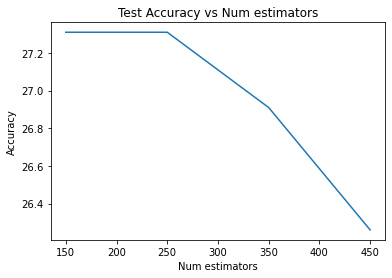

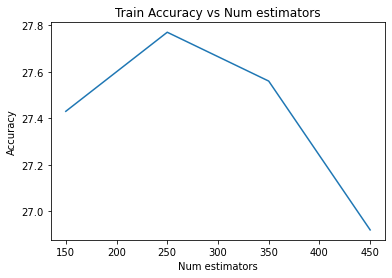

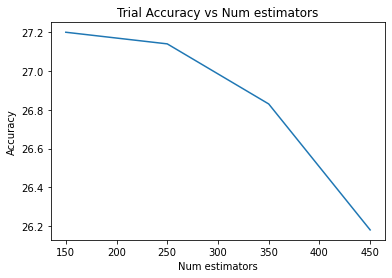

In [ ]:
#ADA boost NoWE
itr= [150, 250, 350, 450]
test_accuracy = [27.31,27.31,26.91,26.26]
train_accuracy = [27.43,27.77,27.56,26.92]
trial_accuracy = [27.2,27.14,26.83,26.18]
accuracy= test_accuracy
plt.plot(itr, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Num estimators')
plt.show()
accuracy= train_accuracy
plt.plot(itr, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Num estimators')
plt.show()
accuracy= trial_accuracy
plt.plot(itr, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Trial Accuracy vs Num estimators')
plt.show()


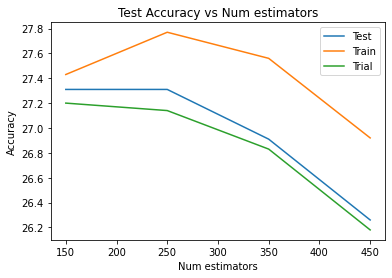

In [ ]:

plt.plot(itr, test_accuracy, label = "Test")
plt.plot(itr, train_accuracy, label = "Train")
plt.plot(itr, trial_accuracy, label = "Trial")
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Num estimators')
plt.legend()
plt.show()


### Range 2


In [6]:
ada_accuracy = []
ada_predVal = []
itr= [150, 175, 200, 225]
for i in tqdm(range(len(itr))):
    clf = AdaBoostClassifier(algorithm="SAMME.R",n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    y_true = testLabels
    print("Test Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(trainData)
    y_true = trainLabels
    print("Train Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    y_pred = clf.predict(validationData)
    y_true = validationLabels
    print("Validation Data:")
    print("Classification report for case: ",itr[i])
    print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
    print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    # ada_accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
    # ada_predVal.append(itr[i])


# plt.plot(ada_predVal, ada_accuracy)
# plt.xlabel('Num estimators')
# plt.ylabel('ada_Accuracy')
# plt.title('ada_Accuracy vs Num estimators')
# plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

Test Data:
Classification report for case:  150
Accuracy % :  27.31
              precision    recall  f1-score   support

           1       0.29      0.01      0.02      2022
           2       0.37      0.15      0.21      1955
           3       0.31      0.01      0.01      1099
           4       0.54      0.22      0.31      1246
           5       0.12      0.00      0.01       786
           6       0.46      0.05      0.09       809
           7       0.41      0.08      0.13       928
           8       0.34      0.04      0.07       669
           9       0.18      0.01      0.02       569
          10       0.10      0.01      0.02       595
          11       0.54      0.30      0.39       696
          12       0.34      0.34      0.34       546
          13       0.37      0.02      0.04       492
          14       0.00      0.00      0.00       536
          15       0.21      0.06      0.09       498
          16       0.21      0.02      0.03       492
          17 

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 25%|██▌       | 1/4 [06:52<20:38, 412.97s/it]

Validation Data:
Classification report for case:  150
Accuracy % :  27.2
              precision    recall  f1-score   support

           1       0.39      0.01      0.02      1011
           2       0.37      0.15      0.21       978
           3       0.20      0.01      0.01       549
           4       0.55      0.23      0.33       624
           5       0.20      0.01      0.01       393
           6       0.38      0.03      0.05       405
           7       0.45      0.08      0.14       465
           8       0.10      0.01      0.02       335
           9       0.28      0.02      0.05       285
          10       0.21      0.02      0.03       298
          11       0.51      0.28      0.36       348
          12       0.30      0.31      0.30       273
          13       0.71      0.02      0.04       246
          14       0.00      0.00      0.00       269
          15       0.11      0.03      0.04       250
          16       0.29      0.04      0.06       246
        

 50%|█████     | 2/4 [15:47<16:08, 484.26s/it]

Validation Data:
Classification report for case:  175
Accuracy % :  27.15
              precision    recall  f1-score   support

           1       0.32      0.01      0.02      1011
           2       0.30      0.18      0.22       978
           3       0.23      0.01      0.02       549
           4       0.48      0.25      0.33       624
           5       0.18      0.01      0.01       393
           6       0.34      0.03      0.05       405
           7       0.44      0.08      0.13       465
           8       0.12      0.02      0.03       335
           9       0.28      0.02      0.05       285
          10       0.18      0.02      0.04       298
          11       0.49      0.28      0.36       348
          12       0.30      0.31      0.30       273
          13       0.71      0.02      0.04       246
          14       0.50      0.00      0.01       269
          15       0.09      0.02      0.04       250
          16       0.30      0.04      0.07       246
       

 75%|███████▌  | 3/4 [26:27<09:15, 555.50s/it]

Validation Data:
Classification report for case:  200
Accuracy % :  27.24
              precision    recall  f1-score   support

           1       0.30      0.02      0.05      1011
           2       0.30      0.20      0.24       978
           3       0.21      0.01      0.02       549
           4       0.43      0.26      0.32       624
           5       0.17      0.01      0.01       393
           6       0.31      0.03      0.05       405
           7       0.37      0.09      0.15       465
           8       0.12      0.02      0.03       335
           9       0.28      0.02      0.05       285
          10       0.22      0.02      0.04       298
          11       0.47      0.29      0.36       348
          12       0.28      0.30      0.29       273
          13       0.71      0.02      0.04       246
          14       0.33      0.01      0.01       269
          15       0.10      0.03      0.04       250
          16       0.30      0.04      0.07       246
       

100%|██████████| 4/4 [36:58<00:00, 554.67s/it]

Validation Data:
Classification report for case:  225
Accuracy % :  27.22
              precision    recall  f1-score   support

           1       0.26      0.03      0.05      1011
           2       0.30      0.20      0.24       978
           3       0.24      0.01      0.02       549
           4       0.43      0.25      0.32       624
           5       0.14      0.01      0.01       393
           6       0.30      0.03      0.05       405
           7       0.36      0.09      0.15       465
           8       0.12      0.02      0.03       335
           9       0.28      0.02      0.05       285
          10       0.22      0.02      0.04       298
          11       0.47      0.29      0.36       348
          12       0.29      0.30      0.29       273
          13       0.71      0.02      0.04       246
          14       0.33      0.01      0.01       269
          15       0.10      0.03      0.04       250
          16       0.28      0.03      0.06       246
       

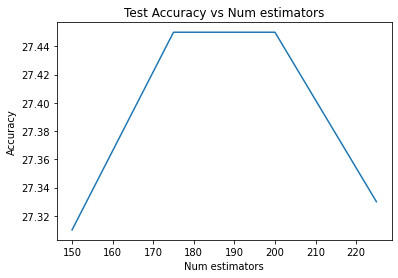

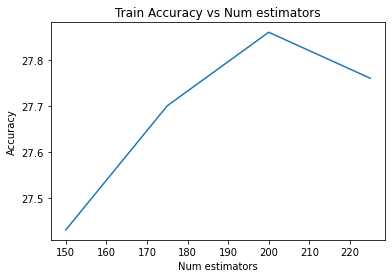

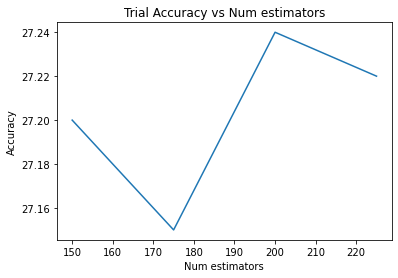

In [ ]:
#ADA boost NoWE
itr= [150, 175, 200, 225]
test_accuracy = [27.31,27.45,27.45,27.33]
train_accuracy = [27.43,27.7,27.86,27.76]
trial_accuracy = [27.2,27.15,27.24,27.22]
accuracy= test_accuracy
plt.plot(itr, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Num estimators')
plt.show()
accuracy= train_accuracy
plt.plot(itr, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Num estimators')
plt.show()
accuracy= trial_accuracy
plt.plot(itr, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Trial Accuracy vs Num estimators')
plt.show()


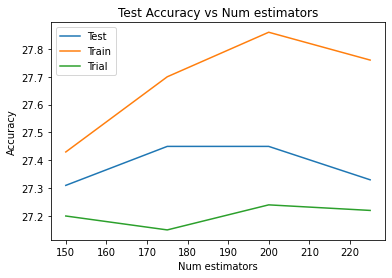

In [ ]:

plt.plot(itr, test_accuracy, label = "Test")
plt.plot(itr, train_accuracy, label = "Train")
plt.plot(itr, trial_accuracy, label = "Trial")
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Num estimators')
plt.legend()
plt.show()


## Algrithm

### "SAMME" 

In [16]:

clf = AdaBoostClassifier(algorithm="SAMME", n_estimators=200, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = testLabels
print("Test Data:")
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_train)
y_true = trainLabels
print("Train Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_val)
y_true = validationLabels
print("Validation Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))


Test Data:
Accuracy % :  22.8
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       1.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       1.00      0.00      0.01       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.67      0.52      0.59       5

/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Accuracy % :  22.65
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7076
           2       0.00      0.00      0.00      6842
           3       0.00      0.00      0.00      3842
           4       1.00      0.00      0.00      4363
           5       0.00      0.00      0.00      2751
           6       0.00      0.00      0.00      2831
           7       0.00      0.00      0.00      3250
           8       0.00      0.00      0.00      2341
           9       0.00      0.00      0.00      1992
          10       0.00      0.00      0.00      2083
          11       0.89      0.00      0.01      2433
          12       0.67      0.00      0.00      1908
          13       0.00      0.00      0.00      1722
          14       0.00      0.00      0.00      1878
          15       0.00      0.00      0.00      1745
          16       0.00      0.00      0.00      1721
          17       0.64      0.49      0.56      

/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Data:
Accuracy % :  22.94
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1011
           2       0.00      0.00      0.00       978
           3       0.00      0.00      0.00       549
           4       1.00      0.00      0.01       624
           5       0.00      0.00      0.00       393
           6       0.00      0.00      0.00       405
           7       0.00      0.00      0.00       465
           8       0.00      0.00      0.00       335
           9       0.00      0.00      0.00       285
          10       0.00      0.00      0.00       298
          11       0.00      0.00      0.00       348
          12       0.00      0.00      0.00       273
          13       0.00      0.00      0.00       246
          14       0.00      0.00      0.00       269
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       246
          17       0.68      0.54      0.60 

/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
itr= [1]
test_accuracy = [22.8]
train_accuracy = [22.65]
trial_accuracy = [22.94]

/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_90906/3837309720.py:4: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  plt.xlim(1, 1)


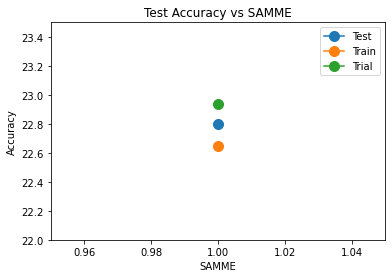

In [ ]:

plt.plot(itr, test_accuracy, label = "Test", marker="o", markersize=10,)
plt.plot(itr, train_accuracy, label = "Train", marker="o", markersize=10,)
plt.plot(itr, trial_accuracy, label = "Trial", marker="o", markersize=10,)
plt.xlim(1, 1)
plt.ylim(22, 23.5)
plt.xlabel('SAMME')
plt.ylabel('Accuracy')
plt.title('Accuracy in SAMME')
plt.legend()
plt.show()


### "SAMME.R" Better

In [17]:
X_train, X_test, y_train, y_test = trainData, testData, trainLabels, testLabels
clf = AdaBoostClassifier(algorithm="SAMME.R",n_estimators=200, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = testLabels
print("Test Data:")
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_train)
y_true = trainLabels
print("Train Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_val)
y_true = validationLabels
print("Validation Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))


Test Data:
Accuracy % :  27.45
              precision    recall  f1-score   support

           1       0.23      0.02      0.04      2022
           2       0.30      0.20      0.24      1955
           3       0.31      0.01      0.02      1099
           4       0.42      0.26      0.32      1246
           5       0.07      0.00      0.01       786
           6       0.44      0.05      0.09       809
           7       0.35      0.08      0.14       928
           8       0.32      0.04      0.07       669
           9       0.16      0.01      0.02       569
          10       0.10      0.01      0.02       595
          11       0.52      0.31      0.39       696
          12       0.34      0.34      0.34       546
          13       0.37      0.02      0.04       492
          14       0.00      0.00      0.00       536
          15       0.20      0.05      0.09       498
          16       0.23      0.02      0.03       492
          17       0.61      0.62      0.61       

In [ ]:
itr= [1]
test_accuracy = [27.45]
train_accuracy = [27.86]
trial_accuracy = [27.24]

/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_90906/1420360272.py:4: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  plt.xlim(1, 1)


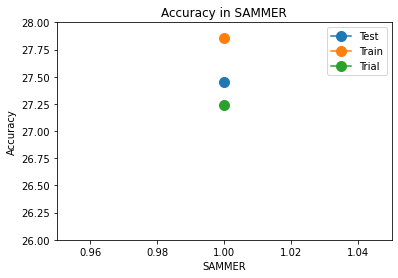

In [ ]:

plt.plot(itr, test_accuracy, label = "Test", marker="o", markersize=10,)
plt.plot(itr, train_accuracy, label = "Train", marker="o", markersize=10,)
plt.plot(itr, trial_accuracy, label = "Trial", marker="o", markersize=10,)
plt.xlim(1, 1)
plt.ylim(26, 28)
plt.xlabel('SAMMER')
plt.ylabel('Accuracy')
plt.title('Accuracy in SAMMER')
plt.legend()
plt.show()


## AdaBoost Final Results
### algorithm="SAMME.R",n_estimators=200
### Accuracy:  27.24

In [18]:
# clf = AdaBoostClassifier(algorithm="SAMME.R",n_estimators=200, random_state=0)
# clf.fit(trainData, trainLabels)
# y_pred = clf.predict(X_test)
# y_true = testLabels
# print("Test Data:")
# accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
# print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
# print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
# y_pred = clf.predict(X_train)
# y_true = trainLabels
# print("Train Data:")
# print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
# print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
# y_pred = clf.predict(X_val)
# y_true = validationLabels
# print("Validation Data:")
# print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
# print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

In [ ]:
filename = 'finalModel_AB_NoWE_2500'
pk.dump(clf,open(filename,'wb'))